In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [36]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x = df.iloc[:,0:2]
y =df.iloc[:,-1]

In [6]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
x_scaled.shape

(400, 2)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [12]:
x_train.shape

(320, 2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Batch Gradient Descent

In [15]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start =time.time()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)
print(time.time()-start)

Epoch 1/100
10/10 [==============================] - 5s 46ms/step - loss: 0.6549 - accuracy: 0.7844 - val_loss: 0.6533 - val_accuracy: 0.7500
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6320 - accuracy: 0.8031 - val_loss: 0.6352 - val_accuracy: 0.7750
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6138 - accuracy: 0.8031 - val_loss: 0.6192 - val_accuracy: 0.7750
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5968 - accuracy: 0.7875 - val_loss: 0.6035 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5795 - accuracy: 0.7844 - val_loss: 0.5877 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5620 - accuracy: 0.7875 - val_loss: 0.5715 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.5433 - accuracy: 0.7969 - val_loss: 0.5540 - val_accuracy: 0.8000
Epoch 8

In [23]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start =time.time()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=320)
print(time.time()-start)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2054 - accuracy: 0.9312 - val_loss: 0.3628 - val_accuracy: 0.8625
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.2051 - accuracy: 0.9312 - val_loss: 0.3628 - val_accuracy: 0.8625
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2049 - accuracy: 0.9312 - val_loss: 0.3636 - val_accuracy: 0.8625
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2047 - accuracy: 0.9344 - val_loss: 0.3640 - val_accuracy: 0.8625
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2045 - accuracy: 0.9344 - val_loss: 0.3644 - val_accuracy: 0.8625
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2044 - accuracy: 0.9344 - val_loss: 0.3649 - val_accuracy: 0.8625
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2042 - accuracy: 0.9344 - val_loss: 0.3650 - val_accuracy: 0.8625
Epoch 8/100
1/1 [=====

<!-- SGD -->

# SGD

In [24]:
model1 = Sequential()
model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'])
start =time.time()
history1 = model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=1)
print(time.time()-start)

Epoch 1/100
320/320 [==============================] - 2s 4ms/step - loss: 0.6483 - accuracy: 0.6313 - val_loss: 0.5472 - val_accuracy: 0.7750
Epoch 2/100
320/320 [==============================] - 1s 4ms/step - loss: 0.4144 - accuracy: 0.8031 - val_loss: 0.4312 - val_accuracy: 0.8000
Epoch 3/100
320/320 [==============================] - 1s 5ms/step - loss: 0.3321 - accuracy: 0.8094 - val_loss: 0.4213 - val_accuracy: 0.8250
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8188 - val_loss: 0.4261 - val_accuracy: 0.8250
Epoch 5/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.8313 - val_loss: 0.4316 - val_accuracy: 0.8500
Epoch 6/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8594 - val_loss: 0.4568 - val_accuracy: 0.8625
Epoch 7/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.8813 - val_loss: 0.4563 - val_accuracy: 0.8625

In [26]:
# BGD>SGD ____TIME
# SGD>BGD _____Performance

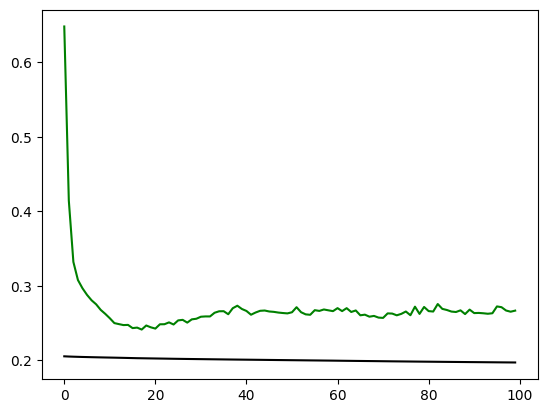

In [27]:
plt.plot(history.history['loss'], color='black')    #BGD
plt.plot(history1.history['loss'], color='green')  #SGD



# Mini_batch_GD

In [28]:
model2 = Sequential()
model2.add(Dense(10,activation='relu',input_dim=2))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.compile(loss='binary_crossentropy',metrics=['accuracy'])
start =time.time()
history2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)
print(time.time()-start)

Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 0.5833 - accuracy: 0.7750 - val_loss: 0.5812 - val_accuracy: 0.7750
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 0.5683 - accuracy: 0.7844 - val_loss: 0.5728 - val_accuracy: 0.7750
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5582 - accuracy: 0.7937 - val_loss: 0.5652 - val_accuracy: 0.7750
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5497 - accuracy: 0.7937 - val_loss: 0.5596 - val_accuracy: 0.7875
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5413 - accuracy: 0.7969 - val_loss: 0.5530 - val_accuracy: 0.8125
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5335 - accuracy: 0.8031 - val_loss: 0.5463 - val_accuracy: 0.8125
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5256 - accuracy: 0.7969 - val_loss: 0.5403 - val_accuracy: 0.8125
Epoch 8/100
4/4 [===

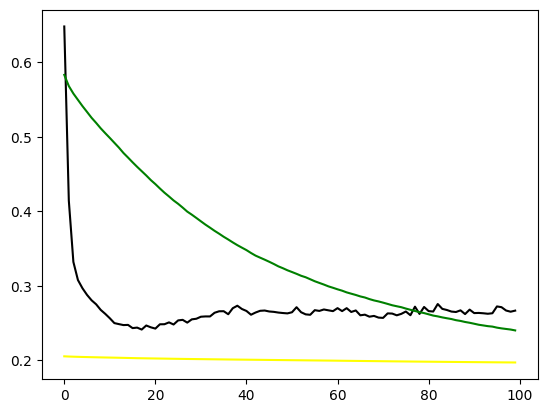

In [35]:
plt.plot(history1.history['loss'], color='black')  #SGD
plt.plot(history2.history['loss'], color='green')  #MBGD
plt.plot(history.history['loss'], color='yellow')  #BGD